# Проект подготовил Хорасанджян Левон

# Исследовательский проект по банковскому маркетинговому датасету

---

## Переменные

**age -** возраст клиента - количественная дискретная переменная - integer

 **job** ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  - тип работы клиента - категориальная номинальная переменная - string

**marital** ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) - семейное положение клиента - категориальная номинальная переменная - string

**education** ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') - уровень образования клиента - категориальная номинальная переменная - string

**default** ('no','yes','unknown') - есть ли неуплата по кредиту - категориальная бинарная переменная - string

**housing** ('no','yes','unknown') - есть ли жилищный кредит  - категориальная бинарная переменная - string

**loan** ('no','yes','unknown')- есть ли потребительский кредит  - категориальная бинарная переменная - string

**contact** ('cellular','telephone') - вид взаимодействия с клиентом - категориальная номинальная переменная - string

**month** (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec') - месяц последнего разговора - категориальная номинальная переменная - string

**day*of*week** ('mon','tue','wed','thu','fri') - день недели последнего разговора - категориальная номинальная переменная - string

**duration** - длительность последнего разговора в секундах - количественная дискретная переменная - integer

**campaign** - количество разговоров с клиентом во время текущей маркетинговой компании - количественная дискретная переменная - integer

**pdays** (999 means client was not previously contacted) - количество дней, прошедших с момента разговора в рамках предыдущей маркетинговой компании - количественная дискретная переменная - integer

**previous** - количество звонков клиенту в рамках предыдущей маркетинговой компании - количественная дискретная переменная - integer

**poutcome** ('failure','nonexistent','success') -  результат предыдущей маркетинговой компании - категориальная номинальная переменная - string

**emp.var.rate** - коэффициент изменения трудоустройства в рамках текущего квартала - количественная непрерывная переменная - decimal

**cons.price.idx** - индекс потребительских цен в рамках текущего месяца - количественная непрерывная переменная - decimal

**cons.conf.idx** - индекс потребительского доверия в рамках текущего месяца - количественная непрерывная переменная - decimal

**euribor3m** - Европейская межбанковская ставка предложения на данный момент - количественная непрерывная переменная - decimal

**nr.employed** - количество сотрудников в рамках текущего квартала - количественная  дискретная переменная - decimal

**subscribed** ('yes','no') - оформил ли клиент срочный вклад - категориальная бинарная переменная - boolean

---

## Работа с таблицей и её обработка

In [1]:
# загружаем датасет и подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('bank_marketing_dataset.csv')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0          no  
1           5191.0          no  
2           5191.0          no  
3           5191.0          no  
4           5191.0          no  
...            ...         ...  
41183       4963.6         yes  
41184       4963.6          no  
41185       4963.6          no  
41186       4963.6         yes  
41187       4963.6          no  

[41188 rows x 21 columns]

In [2]:
# удалим не нужные для анализа колонки, а так же все строки с параметром "unknown" в одном из столбцов
data.drop(['emp.var.rate',  'nr.employed','default'], axis=1, inplace=True)
cols = ['job','education','housing','loan','marital']
for c in cols:
  data = data.drop(np.where(data[c] == 'unknown')[0])
  data.reset_index(drop=True, inplace=True)
data

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       57     services  married          high.school      no   no  telephone   
2       37     services  married          high.school     yes   no  telephone   
3       40       admin.  married             basic.6y      no   no  telephone   
4       56     services  married          high.school      no  yes  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
38240   73      retired  married  professional.course     yes   no   cellular   
38241   46  blue-collar  married  professional.course      no   no   cellular   
38242   56      retired  married    university.degree     yes   no   cellular   
38243   44   technician  married  professional.course      no   no   cellular   
38244   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       149         1    999         0  nonexistent   
2       may         mon       226         1    999         0  nonexistent   
3       may         mon       151         1    999         0  nonexistent   
4       may         mon       307         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
38240   nov         fri       334         1    999         0  nonexistent   
38241   nov         fri       383         1    999         0  nonexistent   
38242   nov         fri       189         2    999         0  nonexistent   
38243   nov         fri       442         1    999         0  nonexistent   
38244   nov         fri       239         3    999         1      failure   

       cons.price.idx  cons.conf.idx  euribor3m subscribed  
0              93.994          -36.4      4.857         no  
1              93.994          -36.4      4.857         no  
2              93.994          -36.4      4.857         no  
3              93.994          -36.4      4.857         no  
4              93.994          -36.4      4.857         no  
...               ...            ...        ...        ...  
38240          94.767          -50.8      1.028        yes  
38241          94.767          -50.8      1.028         no  
38242          94.767          -50.8      1.028         no  
38243          94.767          -50.8      1.028        yes  
38244          94.767          -50.8      1.028         no  

[38245 rows x 18 columns]

In [3]:
# для удобства поменяем тип некоторых категориальных и бинарных переменных на целочисленный
binary_cols = ['housing', 'loan', 'subscribed']
value_list = []
for c in binary_cols:
    for text in data[c].values:
        if text == 'yes':
            value_list.append(1)
        else:
            value_list.append(0)
    data[c] = value_list
    value_list = []
data

age          job  marital            education  housing  loan  \
0       56    housemaid  married             basic.4y        0     0   
1       57     services  married          high.school        0     0   
2       37     services  married          high.school        1     0   
3       40       admin.  married             basic.6y        0     0   
4       56     services  married          high.school        0     1   
...    ...          ...      ...                  ...      ...   ...   
38240   73      retired  married  professional.course        1     0   
38241   46  blue-collar  married  professional.course        0     0   
38242   56      retired  married    university.degree        1     0   
38243   44   technician  married  professional.course        0     0   
38244   74      retired  married  professional.course        1     0   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
38240   cellular   nov         fri       334         1    999         0   
38241   cellular   nov         fri       383         1    999         0   
38242   cellular   nov         fri       189         2    999         0   
38243   cellular   nov         fri       442         1    999         0   
38244   cellular   nov         fri       239         3    999         1   

          poutcome  cons.price.idx  cons.conf.idx  euribor3m  subscribed  
0      nonexistent          93.994          -36.4      4.857           0  
1      nonexistent          93.994          -36.4      4.857           0  
2      nonexistent          93.994          -36.4      4.857           0  
3      nonexistent          93.994          -36.4      4.857           0  
4      nonexistent          93.994          -36.4      4.857           0  
...            ...             ...            ...        ...         ...  
38240  nonexistent          94.767          -50.8      1.028           1  
38241  nonexistent          94.767          -50.8      1.028           0  
38242  nonexistent          94.767          -50.8      1.028           0  
38243  nonexistent          94.767          -50.8      1.028           1  
38244      failure          94.767          -50.8      1.028           0  

[38245 rows x 18 columns]

In [4]:
# создадим новую колонку has_any_loan - есть ли у клиента какой-либо кредит 
data["sum"] = data["loan"]+data["housing"]
data.insert(6,"has_any_loan" , data["sum"].apply(lambda x: 1 if x>=1 else 0))
data.drop(["sum"],axis=1,inplace = True)
data 

age          job  marital            education  housing  loan  \
0       56    housemaid  married             basic.4y        0     0   
1       57     services  married          high.school        0     0   
2       37     services  married          high.school        1     0   
3       40       admin.  married             basic.6y        0     0   
4       56     services  married          high.school        0     1   
...    ...          ...      ...                  ...      ...   ...   
38240   73      retired  married  professional.course        1     0   
38241   46  blue-collar  married  professional.course        0     0   
38242   56      retired  married    university.degree        1     0   
38243   44   technician  married  professional.course        0     0   
38244   74      retired  married  professional.course        1     0   

       has_any_loan    contact month day_of_week  duration  campaign  pdays  \
0                 0  telephone   may         mon       261         1    999   
1                 0  telephone   may         mon       149         1    999   
2                 1  telephone   may         mon       226         1    999   
3                 0  telephone   may         mon       151         1    999   
4                 1  telephone   may         mon       307         1    999   
...             ...        ...   ...         ...       ...       ...    ...   
38240             1   cellular   nov         fri       334         1    999   
38241             0   cellular   nov         fri       383         1    999   
38242             1   cellular   nov         fri       189         2    999   
38243             0   cellular   nov         fri       442         1    999   
38244             1   cellular   nov         fri       239         3    999   

       previous     poutcome  cons.price.idx  cons.conf.idx  euribor3m  \
0             0  nonexistent          93.994          -36.4      4.857   
1             0  nonexistent          93.994          -36.4      4.857   
2             0  nonexistent          93.994          -36.4      4.857   
3             0  nonexistent          93.994          -36.4      4.857   
4             0  nonexistent          93.994          -36.4      4.857   
...         ...          ...             ...            ...        ...   
38240         0  nonexistent          94.767          -50.8      1.028   
38241         0  nonexistent          94.767          -50.8      1.028   
38242         0  nonexistent          94.767          -50.8      1.028   
38243         0  nonexistent          94.767          -50.8      1.028   
38244         1      failure          94.767          -50.8      1.028   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
38240           1  
38241           0  
38242           0  
38243           1  
38244           0  

[38245 rows x 19 columns]

In [5]:
# разобьём переменную age на 6 категорий ("17-24", "25-29", "30-44", "45-54", "55-64", "65+")
# результаты запишем в новую колонку age_group
# этот показатель пригодится для проверки гипотез, основанных на возрастном промежутке клиентов
def age_func(x):
  if x<25:
    return "17-24"
  elif x<30:
    return "25-29"
  elif x<45:
    return "30-44"
  elif x<55:
    return "45-54"
  elif x<65:
    return "55-64"
  else:
    return "65+"
data.insert(0,'age_group',data['age'].apply(age_func))
data

age_group  age          job  marital            education  housing  \
0         55-64   56    housemaid  married             basic.4y        0   
1         55-64   57     services  married          high.school        0   
2         30-44   37     services  married          high.school        1   
3         30-44   40       admin.  married             basic.6y        0   
4         55-64   56     services  married          high.school        0   
...         ...  ...          ...      ...                  ...      ...   
38240       65+   73      retired  married  professional.course        1   
38241     45-54   46  blue-collar  married  professional.course        0   
38242     55-64   56      retired  married    university.degree        1   
38243     30-44   44   technician  married  professional.course        0   
38244       65+   74      retired  married  professional.course        1   

       loan  has_any_loan    contact month day_of_week  duration  campaign  \
0         0             0  telephone   may         mon       261         1   
1         0             0  telephone   may         mon       149         1   
2         0             1  telephone   may         mon       226         1   
3         0             0  telephone   may         mon       151         1   
4         1             1  telephone   may         mon       307         1   
...     ...           ...        ...   ...         ...       ...       ...   
38240     0             1   cellular   nov         fri       334         1   
38241     0             0   cellular   nov         fri       383         1   
38242     0             1   cellular   nov         fri       189         2   
38243     0             0   cellular   nov         fri       442         1   
38244     0             1   cellular   nov         fri       239         3   

       pdays  previous     poutcome  cons.price.idx  cons.conf.idx  euribor3m  \
0        999         0  nonexistent          93.994          -36.4      4.857   
1        999         0  nonexistent          93.994          -36.4      4.857   
2        999         0  nonexistent          93.994          -36.4      4.857   
3        999         0  nonexistent          93.994          -36.4      4.857   
4        999         0  nonexistent          93.994          -36.4      4.857   
...      ...       ...          ...             ...            ...        ...   
38240    999         0  nonexistent          94.767          -50.8      1.028   
38241    999         0  nonexistent          94.767          -50.8      1.028   
38242    999         0  nonexistent          94.767          -50.8      1.028   
38243    999         0  nonexistent          94.767          -50.8      1.028   
38244    999         1      failure          94.767          -50.8      1.028   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
38240           1  
38241           0  
38242           0  
38243           1  
38244           0  

[38245 rows x 20 columns]

In [6]:
# сформируем транспонированный срез по таблице (первые 20 клиентов и 8 колонок)
sliced_data = data.iloc [0:20, 0:8]
sliced_data = sliced_data.T
print(sliced_data)

                     0            1            2         3            4   \
age_group         55-64        55-64        30-44     30-44        55-64   
age                  56           57           37        40           56   
job           housemaid     services     services    admin.     services   
marital         married      married      married   married      married   
education      basic.4y  high.school  high.school  basic.6y  high.school   
housing               0            0            1         0            0   
loan                  0            0            0         0            1   
has_any_loan          0            0            1         0            1   

                    5                    6                    7            8   \
age_group        45-54                55-64                17-24        25-29   
age                 45                   59                   24           25   
job           services               admin.           technician     ser

In [7]:
# отсортируем значения по двум парметрам : возраст и индекс потребительских цен 
sorted_df = data.sort_values(by=['age','cons.price.idx'], ascending=True)
print(sorted_df.head(20))

      age_group  age      job marital    education  housing  loan  \
34979     17-24   17  student  single     basic.9y        1     0   
34997     17-24   17  student  single     basic.9y        1     0   
34603     17-24   18  student  single     basic.9y        1     0   
35062     17-24   18  student  single     basic.6y        1     0   
35929     17-24   18  student  single     basic.6y        0     1   
36145     17-24   18  student  single  high.school        0     0   
36326     17-24   18  student  single     basic.9y        1     0   
36329     17-24   18  student  single     basic.9y        1     0   
36344     17-24   18  student  single     basic.9y        0     0   
25829     17-24   18  student  single  high.school        1     1   
33457     17-24   18  student  single  high.school        0     0   
33458     17-24   18  student  single  high.school        1     0   
28012     17-24   18  student  single     basic.4y        0     0   
28210     17-24   18  student  sin

---

## Гипотезы

### Гипотеза 1

Люди с высшим образованием оформляют потребительский кредит реже остальных

In [8]:
# библиотека для построения графиков
#%pip install plotly 
import plotly.graph_objs as go
# массив с цветами
colors = ["#BDCBEA","#7A8DF4","#FCC03E","#F7B487","#CBC8D2","#DEDCE1","#FFDD93","#A3BDFF","#F1DBCE"]

In [9]:
print("Гипотеза 1")
fig1 = go.Figure(layout = {'paper_bgcolor':"#2B4B82",'font':{'color':'white','size':16},'colorway':colors})
fig1.add_trace(go.Pie(values=data.loan, labels=data.education,textfont=dict(size=16,color='white')))
fig1.show()

Гипотеза 1


Итог: гипотеза полностью опровергнута - люди с высшим образованием оформляют потребительский кредит ЧАЩЕ остальных

### Гипотеза 2

С пожилыми людьми (65+ лет) чаще связывались по стационарному телефону

Гипотеза 2


Text(0, 0.5, 'Number of people')

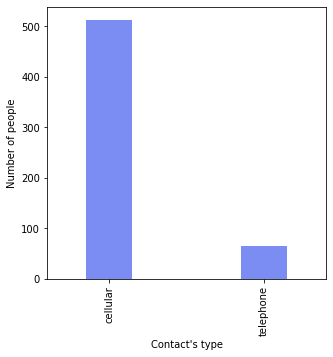

In [10]:
print("Гипотеза 2")
graphic_2 = data[data.age_group=='65+'].groupby(data.contact).size().plot(kind="bar", width=0.3, figsize=(5, 5), color="#7B8CF3")
graphic_2.set_xlabel("Contact's type")
graphic_2.set_ylabel("Number of people")

Итог: гипотеза вновь опровергнута - с большим перевесом люди в возрасте 65+ пользуются сотовым примерно в 6 раз чаще, чем стационарным телефоном

### Гипотеза 3

Люди, состоящие в браке, оформляют жилищный кредит чаще одиноких

In [11]:
fig3 = go.Figure(layout = {'paper_bgcolor':"#2B4B82",'font':{'color':'white','size':16},'colorway':colors})
fig3.add_trace(go.Pie(values=data.housing, labels=data.marital,textfont=dict(size=16,color='white')))
fig3.show()
print("Гипотеза 3")

Гипотеза 3


Итог: гипотеза подтвердилась - люди в браке действительно оформляют жилищный кредит чаще, чем одинокие

### Гипотеза 4

Чаще всего кредиты оформляют люди, деятельность которых связана с администрированием

Гипотеза 4


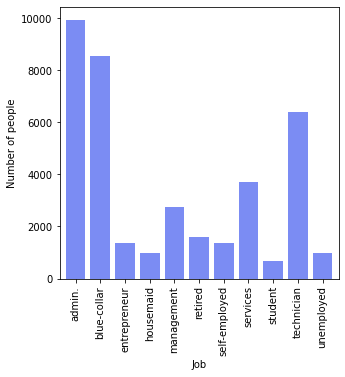

In [12]:
graphic_4 = data.groupby("job").count()['has_any_loan'].plot(kind="bar", width=0.8, figsize=(5, 5), color="#7B8CF3")
graphic_4.set_xlabel("Job")
graphic_4.set_ylabel("Number of people")
print("Гипотеза 4")

Итог: гипотеза подтвердилась - люди, деятельность которых связана с администрированием, действительно оформляют кредиты чаще остальных

### Гипотеза 5

Звонки клиентам чаще всего совершались по понедельникам

In [13]:
print("Гипотеза 5")
fig5 = go.Figure(layout = {'paper_bgcolor':"#2B4B82",'font':{'color':'white','size':16},'colorway':colors})
fig5.add_trace(go.Pie( labels = data.day_of_week,textfont=dict(size=16,color='white')))
fig5.show()

Гипотеза 5


Гипотеза оказалась не верной. Как оказалось, большинство звонков совершалось в четверг, причем число звонков в каждый из дней недели практически одинаково.

### Гипотеза 6

Возрастной промежуток наиболее частого оформления кредитов 30-44 лет

Гипотеза 6


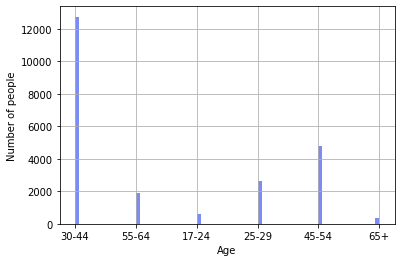

In [14]:
graphic_6 = data[data.has_any_loan == 1].age_group.hist(bins=75, color="#7B8CF3")
graphic_6.set_xlabel("Age")
graphic_6.set_ylabel("Number of people")
print("Гипотеза 6")

Итог: гипотеза подтвердилась - чаще всего кредит оформляется в возрасте от 30 до 44 лет

---

## Сводные таблицы

### Первая сводная таблица

In [15]:
table_1 = pd.pivot_table(data, index=[data.age_group], values=["duration"])
table_1

duration
age_group            
17-24      273.089151
25-29      262.325576
30-44      256.351206
45-54      255.274283
55-64      264.484944
65+        277.346620

Исходя из показателей сводной таблицы по возрастной группе длительности звонков, можно сделать вывод, что наиболее длительные разговоры ведутся с клиентами из возрастной группы 65+

### Вторая сводная таблица

In [16]:
table_2 = pd.pivot_table(data, index=['month'], values=["subscribed"])
table_2

subscribed
month            
apr      0.199507
aug      0.102370
dec      0.478261
jul      0.090347
jun      0.105448
mar      0.507042
may      0.064874
nov      0.098769
oct      0.450683
sep      0.448207

Из второй сводной таблицы приходим к выводу, что март стал наиболее продуктивным месяцем рекламной компании (с большинством оформивших кредит связывались в марте). Также отметим не сильно отстающие месяцы: сентябрь, октябрь и декабрь

### Третья сводная таблица

In [17]:
table_3 = pd.pivot_table(data, index=[data.poutcome], values=["cons.price.idx", "euribor3m"])
table_3.drop("nonexistent")

cons.price.idx  euribor3m
poutcome                           
failure        93.061301   1.673362
success        93.324158   1.009364

Из третьей сводной таблицы можно заметить, что самый низкий индекс доверия наблюдался во времена провальных кампаний. Помимо этого, европейская межбанковская ставка в провальные кампании была выше, чем в успешные, примерно на 65%

---

## Описательные статистики

In [18]:
describe_data = data.describe()
describe_data.drop(["housing","loan","has_any_loan","subscribed"], axis=1, inplace=True)
describe_data

age      duration      campaign         pdays      previous  \
count  38245.000000  38245.000000  38245.000000  38245.000000  38245.000000   
mean      39.860871    258.207583      2.566662    963.531651      0.170009   
std       10.289488    259.792638      2.767473    184.295254      0.487169   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     43.000000    999.000000      7.000000   

       cons.price.idx  cons.conf.idx     euribor3m  
count    38245.000000   38245.000000  38245.000000  
mean        93.570313     -40.541164      3.623298  
std          0.576367       4.623200      1.730226  
min         92.201000     -50.800000      0.634000  
25%         93.075000     -42.700000      1.344000  
50%         93.444000     -41.800000      4.857000  
75%         93.994000     -36.400000      4.961000  
max         94.767000     -26.900000      5.045000

Выводы на основе из таблицы выше:
- Минимальный возраст клиентов 17 лет, максимальный - 98 лет, средний - 39-40 лет.
- Средняя длительность последнего разговора с клиентом - 258 секунд (приблизительно 4 минуты).
- Индекс потребительской уверенности упал в среднем на 40% за текущий месяц.
- Индекс потребительских цен вырос в среднем на 93%.
- Во время текущей маркетинговой компании с клиентом в среднем производилось 2 разговора, хотя максимальное количество звонков клиенту - 43.

In [19]:
import statistics as stat
print(stat.mode(data["month"]))

may


Вывод:  месяцем наиболее активной рекламной кампании был май

In [20]:
print(stat.mean(data[data.subscribed==1]["campaign"]))

2.0575387505871303


Вывод: клиентам, оформившим кредит, на протяжении текущей рекламной компании звонили в среднем два раза

---

## Корреляция

корреляция


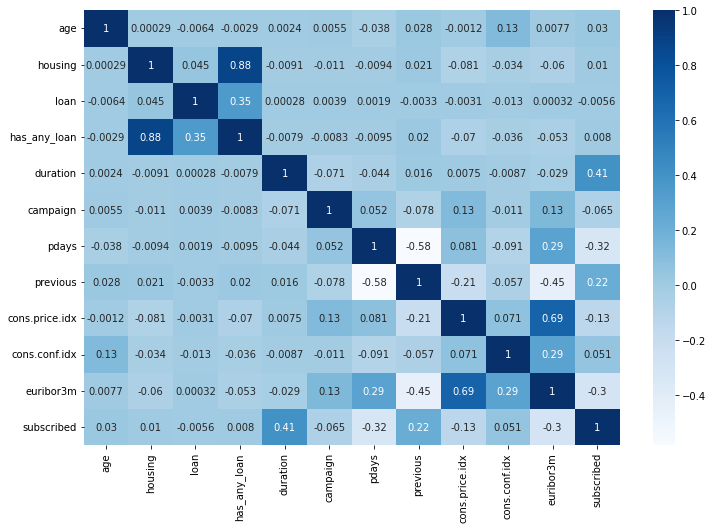

In [21]:
# посчитаем корреляцию между данными 
correlated_data = data.corr()
plt.figure(figsize= (12,8))
sns.heatmap(correlated_data, cmap="Blues", annot=True)
print("корреляция")

Выводы по корреляции: 
- Самая высокая корреляция (0.88) наблюдается между показателями "has_any_loan" и "housing", из чего можно предположить, что по всем видам кредита жилищный является самым распространённым. 
- Чуть менее сильная корреляция (0.69) наблюдается и между показателями "euribor3m" и "cons.price.idx", что означает большую зависимость индекса потребительских цен от европейской межбанковской ставки предложения. 
- Из отрицательных корреляций самая высокая (-0.58) и очевидная наблюдается между "previous" и "pdays", то есть чем больше прошло дней с момента последнего разговора с клиентом, тем реже совершались звонки в рамках предыдущей маркетинговой кампании. 
- Вторая самая высокая отрицательная корреляция между "euribor3m" и "previous", то есть чем выше оказывалась европейской межбанковской ставки предложения, тем реже связывались с клиентами в рамках предыдущей маркетинговой кампании.

---

## Общие выводы по результатам анализа данных

По нашим результатам из 6 выдвинутых гипотез подтвердилось следующие три: 
- люди в браке оформляют жилищный кредит чаще одиноких;
- люди, деятельность которых связана с администрированием, оформляют кредиты чаще других; 
- 30-44 лет — это частый возрастной промежуток кредитного займа.

Из опровергнутых гипотез стало известно, что:
- люди с высшим образованием оформляют потребительский кредит чаще остальных;
- с пожилыми гражданами в возрасте от 65 лет связывались по сотовому телефону примерно в 6 раз чаще, чем по стационарному;
- большинство звонков клиентам совершалось в четверг.

------

# Web Scraping сайта Nike.com

In [22]:
#pip install bs4

In [23]:
#подключаем библиотеки
from bs4 import BeautifulSoup
import requests
import xlrd
import pandas as pd

In [24]:
categories = ['Спортивный стиль','Бег','Баскетбол','Фитнес','Футбол','Скейтбординг']
# страницы, с которых будем собирать ссылки на другие страницы 
links = ['https://www.nike.com/ru/w/mens-lifestyle-shoes-13jrmznik1zy7ok','https://www.nike.com/ru/w/mens-running-shoes-37v7jznik1zy7ok','https://www.nike.com/ru/w/mens-basketball-shoes-3glsmznik1zy7ok','https://www.nike.com/ru/w/mens-training-gym-shoes-58jtoznik1zy7ok','https://www.nike.com/ru/w/mens-soccer-shoes-1gdj0znik1zy7ok','https://www.nike.com/ru/w/mens-skateboarding-shoes-8mfrfznik1zy7ok']

In [25]:
# датафрейм для хранения данных
df = pd.DataFrame()

In [26]:
# парсим названия товаров с общих страниц
names = []
category = []
for i in range(len(links)):
  answer_from_nike = requests.get(links[i])
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  div_titles = soup_page.find_all('div',{'class':'product-card__title'})
  for title in div_titles:
    names.append(title['id'])
    category.append(categories[i])
df["Название модели"] = names
df["Категория"] = category
df

Название модели         Категория
0               Nike Blazer Mid '77  Спортивный стиль
1             Nike Waffle Trainer 2  Спортивный стиль
2                 Nike Air Max Plus  Спортивный стиль
3               Nike Air Max Plus 3  Спортивный стиль
4                  Nike Air Force 1  Спортивный стиль
..                              ...               ...
125         Nike SB Zoom Blazer Low      Скейтбординг
126            Nike SB Nyjah Free 2      Скейтбординг
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг
128              Nike SB BLZR Court      Скейтбординг
129           Nike SB Shane Premium      Скейтбординг

[130 rows x 2 columns]

In [27]:
# парсим цены на товары с общих страниц
prices = []
def conv_to_int(str_element):
  str_element = list(str_element)
  i = 0
  while i<len(str_element):
    if not str_element[i].isdigit():
      str_element.remove(str_element[i])
      i -= 1
    i+=1
  return str_element
for i in range(len(links)):
  answer_from_nike = requests.get(links[i])
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  product_info= soup_page.find_all('div',{'class':'product-card__info'})
  for line in product_info:
    price = line.find('div',{'class':'product-price'}).text
    price = conv_to_int(price)
    prices.append(int(''.join(price)))
df["Цена"] = prices
df

Название модели         Категория   Цена
0               Nike Blazer Mid '77  Спортивный стиль  10499
1             Nike Waffle Trainer 2  Спортивный стиль   8999
2                 Nike Air Max Plus  Спортивный стиль  16299
3               Nike Air Max Plus 3  Спортивный стиль  17299
4                  Nike Air Force 1  Спортивный стиль  11299
..                              ...               ...    ...
125         Nike SB Zoom Blazer Low      Скейтбординг   8799
126            Nike SB Nyjah Free 2      Скейтбординг   7999
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499
128              Nike SB BLZR Court      Скейтбординг   4480
129           Nike SB Shane Premium      Скейтбординг   4980

[130 rows x 3 columns]

In [28]:
# парсим количество доступных цветов с общих страниц
colors = []
for i in range(len(links)):
  answer_from_nike = requests.get(links[i])
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  product_info= soup_page.find_all('div',{'class':'product-card__info'})
  for line in product_info:
    colors_count = line.find('div',{'class':'product-card__product-count'}).text
    colors_count = conv_to_int(colors_count)
    colors.append(int(''.join(colors_count)))
df["Количество цветов"] = colors
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов  
0                    1  
1                    2  
2                    2  
3                    2  
4                    1  
..                 ...  
125                  1  
126                  2  
127                  1  
128                  1  
129                  1  

[130 rows x 4 columns]

In [29]:
# парсим ссылки на каждую модель
product_links = []
for l in links:
  answer_from_nike = requests.get(l)
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  div_titles = soup_page.find_all('a',{'class':'product-card__link-overlay'})
  for title in div_titles:
    product_links.append(title['href'])
df['Ссылка на модель'] = product_links
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов                                   Ссылка на модель  
0                    1  https://www.nike.com/ru/t/кроссовки-blazer-mid...  
1                    2  https://www.nike.com/ru/t/кроссовки-waffle-tra...  
2                    2  https://www.nike.com/ru/t/кроссовки-air-max-pl...  
3                    2  https://www.nike.com/ru/t/кроссовки-air-max-pl...  
4                    1  https://www.nike.com/ru/t/кроссовки-air-force-...  
..                 ...                                                ...  
125                  1        https://www.nike.com/ru/launch/r/DN3754-001  
126                  2  https://www.nike.com/ru/t/кроссовки-для-скейтб...  
127                  1  https://www.nike.com/ru/t/обувь-для-скейтборди...  
128                  1  https://www.nike.com/ru/t/кроссовки-для-скейтб...  
129                  1  https://www.nike.com/ru/t/обувь-для-скейтборди...  

[130 rows x 5 columns]

In [30]:
#парсим номер отдельно для каждой модели по ссылке из списка
model_tag = []
for l in product_links:
  answer_from_nike = requests.get(l)
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  li_titles = soup_page.find('li',{'class':"description-preview__style-color ncss-li"})
  tag = str(li_titles)[61:71]
  model_tag.append(tag)
df["Номер модели"] = model_tag
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов                                   Ссылка на модель  \
0                    1  https://www.nike.com/ru/t/кроссовки-blazer-mid...   
1                    2  https://www.nike.com/ru/t/кроссовки-waffle-tra...   
2                    2  https://www.nike.com/ru/t/кроссовки-air-max-pl...   
3                    2  https://www.nike.com/ru/t/кроссовки-air-max-pl...   
4                    1  https://www.nike.com/ru/t/кроссовки-air-force-...   
..                 ...                                                ...   
125                  1        https://www.nike.com/ru/launch/r/DN3754-001   
126                  2  https://www.nike.com/ru/t/кроссовки-для-скейтб...   
127                  1  https://www.nike.com/ru/t/обувь-для-скейтборди...   
128                  1  https://www.nike.com/ru/t/кроссовки-для-скейтб...   
129                  1  https://www.nike.com/ru/t/обувь-для-скейтборди...   

    Номер модели  
0     DH7694-100  
1     DJ6054-101  
2     604133-139  
3     DO6385-002  
4     DQ0791-100  
..           ...  
125               
126   BV2078-007  
127   AQ7475-001  
128   CV1658-101  
129   DA4184-102  

[130 rows x 6 columns]

In [31]:
#парсим список цветов отдельно для каждой модели по ссылке из списка 
from re import L
def parse_colors(tag):
  tag = str(tag)[72::]
  index = tag.find('<')
  tag = tag[:index]
  l = list(set(tag.split('/')))
  tag = ",".join(l)
  return tag
colors_list = []
for l in product_links:
  answer_from_nike = requests.get(l)
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  li_titles = soup_page.find('li',{'class':"description-preview__color-description ncss-li"})
  colors_list.append(parse_colors(li_titles))
df.insert(4,'Цвета модели',colors_list)
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов                                       Цвета модели  \
0                    1  Light Smoke Grey,Белый,Тренировочный красный,P...   
1                    2  Hyper Royal,Light Smoke Grey,Белый,Тренировочн...   
2                    2                        Холодный серый,Белый,Черный   
3                    2                      Черный,Красный,Reflect Silver   
4                    1          Белый,Noble Green,Красный,Metallic Silver   
..                 ...                                                ...   
125                  1                                                      
126                  2           Bright Crimson,Neutral Grey,Белый,Черный   
127                  1          Gum Light Brown,Черный,Thunder Grey,Белый   
128                  1                                       Белый,Черный   
129                  1                       Парус,Light Smoke Grey,Белый   

                                      Ссылка на модель Номер модели  
0    https://www.nike.com/ru/t/кроссовки-blazer-mid...   DH7694-100  
1    https://www.nike.com/ru/t/кроссовки-waffle-tra...   DJ6054-101  
2    https://www.nike.com/ru/t/кроссовки-air-max-pl...   604133-139  
3    https://www.nike.com/ru/t/кроссовки-air-max-pl...   DO6385-002  
4    https://www.nike.com/ru/t/кроссовки-air-force-...   DQ0791-100  
..                                                 ...          ...  
125        https://www.nike.com/ru/launch/r/DN3754-001               
126  https://www.nike.com/ru/t/кроссовки-для-скейтб...   BV2078-007  
127  https://www.nike.com/ru/t/обувь-для-скейтборди...   AQ7475-001  
128  https://www.nike.com/ru/t/кроссовки-для-скейтб...   CV1658-101  
129  https://www.nike.com/ru/t/обувь-для-скейтборди...   DA4184-102  

[130 rows x 7 columns]

In [32]:
# парсим количество отзывов отдельно на каждую модель по ссылке из списка 
review = []
def parse_review(tag):
  tag = str(tag)[29::]
  index = tag.find(')')
  tag = tag[:index]
  if(len(tag)==0):
    return 0
  else:
    return int(''.join(conv_to_int(tag)))
for l in product_links:
  answer_from_nike = requests.get(l)
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  h3_titles = soup_page.find('h3',{'class':"css-xd87ek"})
  review.append(parse_review(h3_titles))
df["Количество отзывов"] = review
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов                                       Цвета модели  \
0                    1  Light Smoke Grey,Белый,Тренировочный красный,P...   
1                    2  Hyper Royal,Light Smoke Grey,Белый,Тренировочн...   
2                    2                        Холодный серый,Белый,Черный   
3                    2                      Черный,Красный,Reflect Silver   
4                    1          Белый,Noble Green,Красный,Metallic Silver   
..                 ...                                                ...   
125                  1                                                      
126                  2           Bright Crimson,Neutral Grey,Белый,Черный   
127                  1          Gum Light Brown,Черный,Thunder Grey,Белый   
128                  1                                       Белый,Черный   
129                  1                       Парус,Light Smoke Grey,Белый   

                                      Ссылка на модель Номер модели  \
0    https://www.nike.com/ru/t/кроссовки-blazer-mid...   DH7694-100   
1    https://www.nike.com/ru/t/кроссовки-waffle-tra...   DJ6054-101   
2    https://www.nike.com/ru/t/кроссовки-air-max-pl...   604133-139   
3    https://www.nike.com/ru/t/кроссовки-air-max-pl...   DO6385-002   
4    https://www.nike.com/ru/t/кроссовки-air-force-...   DQ0791-100   
..                                                 ...          ...   
125        https://www.nike.com/ru/launch/r/DN3754-001                
126  https://www.nike.com/ru/t/кроссовки-для-скейтб...   BV2078-007   
127  https://www.nike.com/ru/t/обувь-для-скейтборди...   AQ7475-001   
128  https://www.nike.com/ru/t/кроссовки-для-скейтб...   CV1658-101   
129  https://www.nike.com/ru/t/обувь-для-скейтборди...   DA4184-102   

     Количество отзывов  
0                     4  
1                     0  
2                    63  
3                     0  
4                     0  
..                  ...  
125                   0  
126                  49  
127                  17  
128                  13  
129                   2  

[130 rows x 8 columns]

In [33]:
# парсим особенности отдельно для каждой модели по ссылке из списка 
features = []
def parse_features(line):
  line = str(line)[50::]
  index = line.find('<')
  return line[:index]
for l in product_links:
  answer_from_nike = requests.get(l)
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  title = soup_page.find('div',{'class':'headline-5 text-color-accent d-sm-ib'})
  if(title!=None):
    features.append(parse_features(title))
  else:
    features.append("Отсутствуют")
df["Особенности"] = features
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов                                       Цвета модели  \
0                    1  Light Smoke Grey,Белый,Тренировочный красный,P...   
1                    2  Hyper Royal,Light Smoke Grey,Белый,Тренировочн...   
2                    2                        Холодный серый,Белый,Черный   
3                    2                      Черный,Красный,Reflect Silver   
4                    1          Белый,Noble Green,Красный,Metallic Silver   
..                 ...                                                ...   
125                  1                                                      
126                  2           Bright Crimson,Neutral Grey,Белый,Черный   
127                  1          Gum Light Brown,Черный,Thunder Grey,Белый   
128                  1                                       Белый,Черный   
129                  1                       Парус,Light Smoke Grey,Белый   

                                      Ссылка на модель Номер модели  \
0    https://www.nike.com/ru/t/кроссовки-blazer-mid...   DH7694-100   
1    https://www.nike.com/ru/t/кроссовки-waffle-tra...   DJ6054-101   
2    https://www.nike.com/ru/t/кроссовки-air-max-pl...   604133-139   
3    https://www.nike.com/ru/t/кроссовки-air-max-pl...   DO6385-002   
4    https://www.nike.com/ru/t/кроссовки-air-force-...   DQ0791-100   
..                                                 ...          ...   
125        https://www.nike.com/ru/launch/r/DN3754-001                
126  https://www.nike.com/ru/t/кроссовки-для-скейтб...   BV2078-007   
127  https://www.nike.com/ru/t/обувь-для-скейтборди...   AQ7475-001   
128  https://www.nike.com/ru/t/кроссовки-для-скейтб...   CV1658-101   
129  https://www.nike.com/ru/t/обувь-для-скейтборди...   DA4184-102   

     Количество отзывов  Особенности  
0                     4  Отсутствуют  
1                     0  Отсутствуют  
2                    63  Отсутствуют  
3                     0  Отсутствуют  
4                     0  Отсутствуют  
..                  ...          ...  
125                   0  Отсутствуют  
126                  49  Отсутствуют  
127                  17  Отсутствуют  
128                  13  Отсутствуют  
129                   2  Отсутствуют  

[130 rows x 9 columns]

In [34]:
# парсим рейтинг отдельно для каждой модели по ссылке из списка
rating_num = []
def parse_rating(tag):
  tag = str(tag)[26::]
  index = tag.find('<')
  tag = tag[:index]
  return tag
for l in product_links:
  answer_from_nike = requests.get(l)
  soup_page = BeautifulSoup (answer_from_nike.text,"html.parser")
  p_titles = soup_page.find('p',{'class':"d-sm-ib pl4-sm"})
  if p_titles!=None:
    rating_num .append(parse_rating(p_titles))
  else:
    rating_num.append("0")
df["Рейтинг"] = rating_num
df = df.astype({'Рейтинг':'float'})
df

Название модели         Категория   Цена  \
0               Nike Blazer Mid '77  Спортивный стиль  10499   
1             Nike Waffle Trainer 2  Спортивный стиль   8999   
2                 Nike Air Max Plus  Спортивный стиль  16299   
3               Nike Air Max Plus 3  Спортивный стиль  17299   
4                  Nike Air Force 1  Спортивный стиль  11299   
..                              ...               ...    ...   
125         Nike SB Zoom Blazer Low      Скейтбординг   8799   
126            Nike SB Nyjah Free 2      Скейтбординг   7999   
127  Nike SB Zoom Stefan Janoski RM      Скейтбординг   7499   
128              Nike SB BLZR Court      Скейтбординг   4480   
129           Nike SB Shane Premium      Скейтбординг   4980   

     Количество цветов                                       Цвета модели  \
0                    1  Light Smoke Grey,Белый,Тренировочный красный,P...   
1                    2  Hyper Royal,Light Smoke Grey,Белый,Тренировочн...   
2                    2                        Холодный серый,Белый,Черный   
3                    2                      Черный,Красный,Reflect Silver   
4                    1          Белый,Noble Green,Красный,Metallic Silver   
..                 ...                                                ...   
125                  1                                                      
126                  2           Bright Crimson,Neutral Grey,Белый,Черный   
127                  1          Gum Light Brown,Черный,Thunder Grey,Белый   
128                  1                                       Белый,Черный   
129                  1                       Парус,Light Smoke Grey,Белый   

                                      Ссылка на модель Номер модели  \
0    https://www.nike.com/ru/t/кроссовки-blazer-mid...   DH7694-100   
1    https://www.nike.com/ru/t/кроссовки-waffle-tra...   DJ6054-101   
2    https://www.nike.com/ru/t/кроссовки-air-max-pl...   604133-139   
3    https://www.nike.com/ru/t/кроссовки-air-max-pl...   DO6385-002   
4    https://www.nike.com/ru/t/кроссовки-air-force-...   DQ0791-100   
..                                                 ...          ...   
125        https://www.nike.com/ru/launch/r/DN3754-001                
126  https://www.nike.com/ru/t/кроссовки-для-скейтб...   BV2078-007   
127  https://www.nike.com/ru/t/обувь-для-скейтборди...   AQ7475-001   
128  https://www.nike.com/ru/t/кроссовки-для-скейтб...   CV1658-101   
129  https://www.nike.com/ru/t/обувь-для-скейтборди...   DA4184-102   

     Количество отзывов  Особенности  Рейтинг  
0                     4  Отсутствуют      4.8  
1                     0  Отсутствуют      0.0  
2                    63  Отсутствуют      4.3  
3                     0  Отсутствуют      0.0  
4                     0  Отсутствуют      0.0  
..                  ...          ...      ...  
125                   0  Отсутствуют      0.0  
126                  49  Отсутствуют      3.9  
127                  17  Отсутствуют      4.3  
128                  13  Отсутствуют      4.1  
129                   2  Отсутствуют      2.5  

[130 rows x 10 columns]

In [35]:
writer = pd.ExcelWriter('nike_web_scraping.xlsx')
df.to_excel(writer)
writer.save()